#### This notebook designed to prepare the plots in Figure 1 (a) and (b) in the paper with title "Distributionally Robust Linear Quadratic Control".
#### This paper is submitted to NeurIPS 2023.

To get data of the results run the following lines. 




    python figure_1a.py
    python figure_1b.py

In [8]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import colors as mcolors
from matplotlib.colors import ListedColormap

cm_piyg = plt.cm.PiYG
cm_bright = ListedColormap(["#b30065", "#178000"])
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)


fw_color = colors["brown"]
mosek_color = colors["gray"]

In [15]:
def plot_figure(plt, x, y, color="b", label=None, ls="solid", with_shade=True):
    mean_ = np.mean(y, axis=1)
    err_ = np.std(y, axis=1)
    plt.plot(x, mean_, color=color, linewidth=4, linestyle=ls, label=label)
    plt.plot(x, mean_ + err_, color=color, linewidth=3, alpha=0.2)
    plt.plot(x, mean_ - err_, color=color, linewidth=3, alpha=0.2)
    if with_shade:
        plt.fill_between(x, mean_ - err_, mean_ + err_, alpha=0.1, facecolor=color)


import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
mosek_time = np.load("results/data/scale/mosek_solver_time_n_10.npy")
fw_time = np.load("results/data/scale/fw_solver_time_n_10.npy")
mosek_time = mosek_time
fw_time = fw_time
mosek_time[mosek_time >= 500] = np.nan
fw_time[fw_time >= 500] = np.nan
range_mat = np.arange(1, 10, 1)
T_range = np.hstack([range_mat, range_mat * 10, 100])

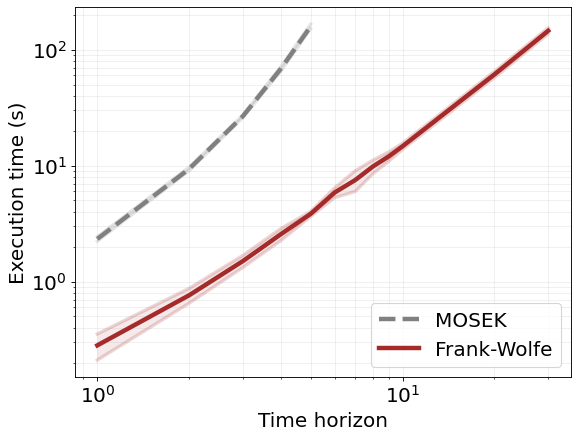

In [16]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=80)
plot_figure(ax, T_range, mosek_time, ls="dashed", color=mosek_color, label="MOSEK")
plot_figure(ax, T_range, fw_time, color=fw_color, label="Frank-Wolfe")
# plt.grid(alpha=0.2)
# ax.set_xlim([1, 10^2])
#Direct input 
# plt.rcParams['text.latex.preamble']=[r"\usepackage{lmodern}"]
#Options
params = {'text.usetex' : True,
          'font.size' : 11,
          'font.family' : 'Sharif',
          'text.latex.unicode': True,
          }
plt.grid(True, which="both", alpha=0.2)
plt.ylabel("Execution time (s)")

plt.xlabel("Time horizon")
ax.set_xscale("log")
ax.set_yscale("log")
# ax.set_xlim([1e0, 1e2])
plt.legend()
plt.show()
fig.savefig(
            "results/figures/scale_plot.pdf",
            format="pdf",
    )
np.savez("results/data/run_times_n_2_T_10.npz", mosek_time=mosek_time, fw_time=fw_time, T_range=np.array(T_range), )

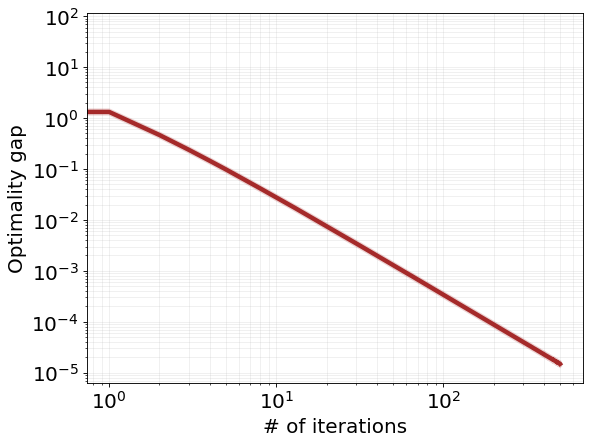

In [17]:
data = np.load("results/data/convergence/converge.npz")
gap = data["fw_duality_gap"]
x = np.arange(len(gap[:, 0]))
fig, ax = plt.subplots(figsize=(8, 6), dpi=80)
plot_figure(ax, x, gap, color=fw_color)
ax.set_xscale("log")
ax.set_yscale("log")
plt.grid(True, which="both", alpha=0.2)
plt.ylabel("Optimality gap")
plt.xlabel("# of iterations")
plt.show()
fig.savefig(
            "results/figures/convergence.pdf",
            format="pdf",
    )
